<a href="https://colab.research.google.com/github/roscibely/Animations-with-Matplotlib/blob/main/Animation_ball_beam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib notebook

from pylab import *
import time
from ipywidgets import interact, interactive

# limit on beam angle in radians
ulimit = 0.2

def draw_beam(fig,ax):
    # Draw the ball and beam diagram on a given figure and axis
    ax.axis('off')
    ax.axis('equal')
    ax.set(xlim = (-0.2,1.2), ylim = (-0.3,0.3))
    
    # draw ball, beam, and set point patch
    ax.plot(0.5,0.049,'r.',ms=50)
    ax.plot(array([0.0,cos(0.0)]), array([0.0,sin(0.0)]), lw=5)
    ax.add_patch(Polygon([[0.5, -0.01], [0.5-0.03, -0.05], [0.5+0.03, -0.05]]))

    # draw pivot patch
    ax.add_patch(Polygon([[0.0,0.0],[0.02,-0.25],[-0.02,-0.25]]))
    
    # beam hi and lo limit patches
    ulimit = 0.2
    xa = cos(ulimit)
    ya = sin(ulimit)
    ax.add_patch(Polygon([[xa-0.05, ya+0.01],[xa+0.05, ya+0.01], \
                          [xa+0.05, ya+0.02],[xa-0.05, ya+0.02]]))
    ax.add_patch(Polygon([[xa-0.05,-ya-0.01],[xa+0.05,-ya-0.01], \
                          [xa+0.05,-ya-0.02],[xa-0.05,-ya-0.02]]))
    fig.canvas.draw()

def update_beam(fig,ax,x,u,SP):
    # Update the ball and beam diagram with current state values.
    
    # Limit beam angle
    u = -ulimit if u < -ulimit else ulimit if u > ulimit else u
    
    # Determine ball position, and if it rolled off the beam
    x = -0.05 if x < 0 else 1.02 if x > 1.0 else x
    y = 0.049/cos(u) + x*sin(u) if x >= 0.0 and x <= 1.0 else -0.2

    # update ball, beam, and setpoint positions
    ax.lines[0].set(xdata=x, ydata=y)
    ax.lines[1].set(xdata=[0.0,cos(u)], ydata=[0.0,sin(u)])
    ax.patches[0].set_xy([[SP*cos(u), -0.01 + SP*sin(u)], \
              [SP*cos(u) - 0.03, -0.05 + SP*sin(u)], \
              [SP*cos(u) + 0.03, -0.05 + SP*sin(u)]])
    fig.canvas.draw()
    
def draw_plot(fig,ax,SP):
    
    # set up xplot to display ball position
    xplot = ax
    xplot.set(xlim=(0,tf),ylim=(0,1),xlabel='Time [dimensionless]',ylabel='Position')
    xplot.plot([],[],'b')
    xplot.plot([0,tf],[SP,SP],'b--')

    # set up second axist to display beam angle
    uplot = ax.twinx()
    uplot.set(xlim=(0,tf),ylim=(-ulimit,ulimit))
    uplot.set_ylabel('Beam Angle', color='r')
    for tl in uplot.get_yticklabels():
        tl.set_color('r')
    uplot.plot([],[],'r')
    uplot.plot([0,tf],[0,0],'r--')
    
    # return lines for updating
    return xplot,uplot

def update_plot(ax,t,y):
    tdata = append(ax.lines[0].get_xdata(),t)
    ydata = append(ax.lines[0].get_ydata(),y)
    ax.lines[0].set(xdata=tdata, ydata=ydata)

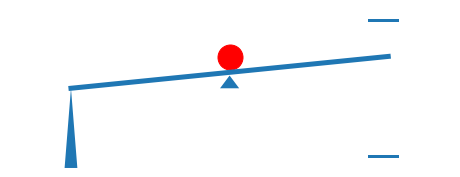

In [2]:
fig,ax = subplots(1,1,figsize=(8,3))
draw_beam(fig,ax)
update_beam(fig,ax,0.5,0.1,0.5)

In [4]:
x=0.1
u=0.5
SP=0.5

200


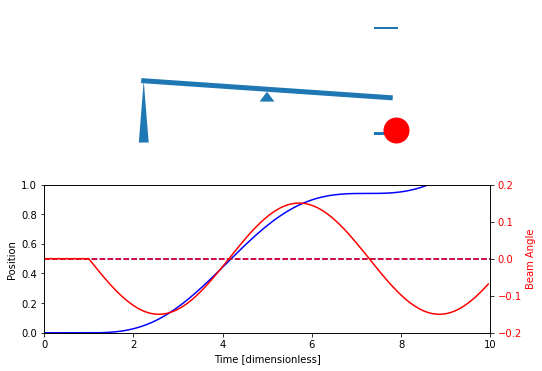

In [5]:
# simulation parameters
dt = 0.05
tf = 10.0

# initialize simulation 
t = 0.0      # initial time
x = 0.0      # initial ball position
v = 0.0      # initial ball velocity

# set up figure window with two axes
fig,ax = subplots(2,1,figsize=(8,6))
beam_axes = ax[0]
plot_axes = ax[1]

# draw ball and beam apparatus
draw_beam(fig,beam_axes)
update_beam(fig,beam_axes,x,u,0.5)

# draw plotting axes
xplot,uplot = draw_plot(fig,plot_axes,SP)
t=np.arange(0, 10.0, dt)
print(len(t))
# simulation/animation
for i in range(len(t)):
    # beam angle
    if t[i] <= 1.0:
      u = 0.0 
    else:
      u= -0.15*sin(t[i]-1.0)
    # update velocity and position
    v += -sin(u)*dt
    x += v*dt
    
    # update plots
    update_beam(fig,beam_axes,x,u,SP)
    update_plot(xplot,t[i],x)
    update_plot(uplot,t[i],u)
    
    # pause for time step
    time.sleep(dt)